# Lib

In [1]:
import os 
import pandas as pd
import numpy as np
import datetime as dt

from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [130]:
fname_schema = "SCHEMA_21JAN2021_31AUG2021.parquet"
obito_pares = "PAREADOS_COM_INTERVALOS_OBITO_6.parquet"
hospital_pares = "PAREADOS_COM_INTERVALOS_HOSPITAL_6.parquet"
#surv_obito = "SURVIVAL_CORONAVAC_D1D2_OBITO_1.parquet"
#surv_hospital = "SURVIVAL_CORONAVAC_D1D2_HOSPITAL_1.parquet"

vaccine = "CORONAVAC"
data_folder = os.path.join("..", "output", "data")
pareado_folder = os.path.join("..", "output", "PAREAMENTO", vaccine)

fschema = pd.read_parquet(os.path.join(data_folder, fname_schema))

In [8]:
obito_df = pd.read_parquet(os.path.join(pareado_folder, obito_pares))
obito_df

,CPF,DATA D1,DATA D2,DATA OBITO COVID,DATA OBITO GERAL,DATA HOSPITALIZACAO,TIPO,PAR,CASO D1 INTERVALO,CASO D1 CENSURADO,CASO D2 INTERVALO,CASO D2 CENSURADO,CONTROLE D1 INTERVALO,CONTROLE D1 CENSURADO,CONTROLE D2 INTERVALO,CONTROLE D2 CENSURADO
0,13933680344,2021-01-21,2021-02-14,NaT,NaT,NaT,CASO,14358794300,24.0,True,48.0,True,24.0,True,48.0,True
2,16650700304,2021-01-21,2021-02-14,NaT,NaT,NaT,CASO,21177368315,24.0,True,80.0,True,24.0,True,80.0,True
4,10965394387,2021-01-21,2021-02-14,NaT,NaT,NaT,CASO,57410321334,24.0,True,46.0,True,24.0,True,46.0,True
6,25949160304,2021-01-21,2021-02-16,NaT,NaT,NaT,CASO,18950892391,26.0,True,44.0,True,26.0,True,44.0,True
8,12138070344,2021-01-22,2021-02-19,NaT,NaT,NaT,CASO,67859844320,28.0,True,89.0,True,28.0,True,89.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332416,17427690397,2021-08-31,2021-09-28,NaT,NaT,NaT,CASO,09062071856,0.0,True,NaN,True,0.0,True,NaN,True
332418,73939463353,2021-08-31,2021-10-18,NaT,NaT,NaT,CASO,36293148304,0.0,True,NaN,True,0.0,True,NaN,True
332420,97524514387,2021-08-31,2021-10-06,NaT,NaT,NaT,CASO,19454996304,0.0,True,NaN,True,0.0,True,NaN,True
332422,31823572391,2021-08-31,2021-10-01,NaT,NaT,NaT,CASO,17246636315,0.0,True,NaN,True,0.0,True,NaN,True


In [3]:
pares = pd.read_parquet(os.path.join(pareado_folder, "EVENTOS_PAREADOS_1.parquet"))

In [5]:
condition = (pares["TIPO"]=="CASO") & (pd.notna(pares["DATA HOSPITALIZACAO"]) & (pares["PAREADO"]==True))
pares[condition]

,CPF,DATA D1,DATA D2,DATA OBITO COVID,DATA OBITO GERAL,DATA HOSPITALIZACAO,TIPO,PAR,PAREADO
24,21459789334,2021-01-22,2021-03-25,NaT,NaT,[2021-02-22T00:00:00.000000],CASO,35693797368,True
56,06865860349,2021-01-22,2021-03-03,NaT,NaT,[2021-01-31T00:00:00.000000],CASO,61364661390,True
360,14397714304,2021-01-24,2021-02-21,NaT,NaT,[2021-03-04T00:00:00.000000],CASO,12024481353,True
362,12313017320,2021-01-24,2021-03-17,NaT,NaT,[2021-02-18T00:00:00.000000],CASO,38168251334,True
562,21303053349,2021-01-25,2021-02-22,NaT,NaT,[2021-03-07T00:00:00.000000],CASO,02343205833,True
...,...,...,...,...,...,...,...,...,...
248928,19478429353,2021-07-30,NaT,NaT,NaT,[2021-03-02T00:00:00.000000],CASO,21519021100,True
249036,87888556353,2021-08-06,2021-09-02,NaT,NaT,[2021-02-25T00:00:00.000000],CASO,35885602387,True
249074,15548660306,2021-08-08,2021-09-07,NaT,NaT,[2021-05-14T00:00:00.000000],CASO,11693444291,True
249118,22846581304,2021-08-10,2021-09-06,NaT,NaT,[2021-05-07T00:00:00.000000],CASO,23053356368,True


In [6]:
condition = (pares["TIPO"]=="CONTROLE") & (pd.notna(pares["DATA HOSPITALIZACAO"]) & (pares["PAREADO"]==True))
pares[condition]

,CPF,DATA D1,DATA D2,DATA OBITO COVID,DATA OBITO GERAL,DATA HOSPITALIZACAO,TIPO,PAR,PAREADO
81,05901243315,2021-04-01,2021-06-06,NaT,NaT,[2021-05-03T00:00:00.000000],CONTROLE,12767360453,True
283,45522146320,2021-03-31,2021-05-08,NaT,NaT,[2021-02-23T00:00:00.000000],CONTROLE,10496580353,True
363,38168251334,2021-04-02,2021-05-15,NaT,NaT,[2021-04-20T00:00:00.000000],CONTROLE,12313017320,True
623,28607775200,NaT,NaT,2021-05-02,NaT,[2021-04-28T00:00:00.000000],CONTROLE,31010946315,True
777,46430695387,NaT,NaT,NaT,2021-04-17,[2021-03-25T00:00:00.000000],CONTROLE,38123282320,True
...,...,...,...,...,...,...,...,...,...
248225,47995807368,NaT,NaT,2021-04-27,NaT,[2021-04-18T00:00:00.000000],CONTROLE,11534877304,True
248247,20462700372,NaT,NaT,2021-04-08,NaT,[2021-03-25T00:00:00.000000],CONTROLE,79357938320,True
248435,16701933300,NaT,NaT,NaT,2021-07-29,[2021-03-18T00:00:00.000000],CONTROLE,43115608349,True
248943,14195895391,NaT,NaT,NaT,NaT,[2021-05-22T00:00:00.000000],CONTROLE,41134591349,True


In [7]:
1335/1868

0.7146680942184154

In [6]:
fsurv = obito.fsurvival
caso = fsurv[fsurv["TIPO"]=="CASO"]
controle = fsurv[fsurv["TIPO"]=="CONTROLE"]
caso.sample(n=10, replace=True)

,CPF,TIPO,t - D1 OBITO,E - D1 OBITO,t - D2 OBITO,E - D2 OBITO,BAIRRO,IDADE,SEXO,AGE ELIGIBLE
125076,12322393304,CASO,2.0,False,NaN,False,CANINDEZINHO,71,M,False
154614,09093419315,CASO,29.0,False,128.0,False,JOAQUIM TAVORA,69,M,False
112492,05957508349,CASO,2.0,False,NaN,False,DIONISIO TORRES,71,F,False
109402,13928503391,CASO,21.0,False,138.0,False,MANOEL SATIRO,75,F,False
64756,89638115300,CASO,4.0,False,NaN,False,CIDADE DOS FUNCIONARIOS,75,F,False
70102,43366074353,CASO,3.0,False,0.0,False,CONJUNTO PALMEIRAS,76,M,False
219094,38978989349,CASO,44.0,False,107.0,False,BONSUCESSO,63,F,False
246028,15584763349,CASO,38.0,False,NaN,False,NÃO INFOMRADO,63,M,False
47672,28438485391,CASO,15.0,False,3.0,False,PASSARE,91,F,True
190576,37289950704,CASO,34.0,False,6.0,False,JARDIM GUANABARA,68,M,False


## Lifelines tests

In [4]:
%run ../ve_estimate.py

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [04:29<00:00,  1.35s/it]


In [73]:
fschema.columns

Index(['NOME', 'CPF', 'CNS', 'DATA NASCIMENTO', 'NOME MAE', 'CEP', 'BAIRRO',
       'SEXO', 'SITUACAO VACINEJA', 'cpf LINKAGE VACINADOS',
       'id LINKAGE INTEGRASUS', 'ordem LINKAGE OBITO COVID',
       'cpf LINKAGE CARTORIOS', 'primary key LINKAGE SIVEP',
       'TESTE POSITIVO ANTES COORTE', 'POSITIVOS COLETA DATA',
       'POSITIVOS SOLICITACAO DATA', 'VACINA APLICADA', 'DATA D1', 'DATA D2',
       'DATA D3', 'DATA D4', 'GRUPO PRIORITARIO', 'ORDEM(OBITO COVID)',
       'NUMERODO(OBITO COVID)', 'DATA PRI SINTOMAS(OBITO COVID)', 'DATA OBITO',
       'DATA FALECIMENTO(CARTORIOS)', 'NUMERODO(CARTORIOS)',
       'DATA NOTIFICACAO SIVEP', 'DATA INTERNACAO', 'EVOLUCAO',
       'DATA EVOLUCAO', 'UTI', 'DT_ENTUTI', 'COLETA APOS OBITO',
       'SOLICITACAO APOS OBITO', 'OBITO INCONSISTENCIA COVID',
       'OBITO INCONSISTENCIA CARTORIOS', 'STATUS VACINACAO DURANTE COORTE',
       'STATUS VACINACAO', 'IDADE', 'DATA HOSPITALIZACAO',
       'OBITO ANTES COORTE', 'HOSPITALIZACAO ANTES COORTE']

In [20]:
1-(241/342)

0.29532163742690054

In [19]:
fschema_astra = fschema[fschema["VACINA APLICADA"]=="ASTRAZENECA"]
fschema_cor = fschema[fschema["VACINA APLICADA"]=="CORONAVAC"]
fschema_pfizer = fschema[fschema["VACINA APLICADA"]=="PFIZER"]

In [16]:
fschema_astra["DATA OBITO"].notnull().sum()

212

In [18]:
fschema_cor["DATA OBITO"].notnull().sum()

456

In [22]:
fschema_pfizer["DATA OBITO"].notnull().sum()

29

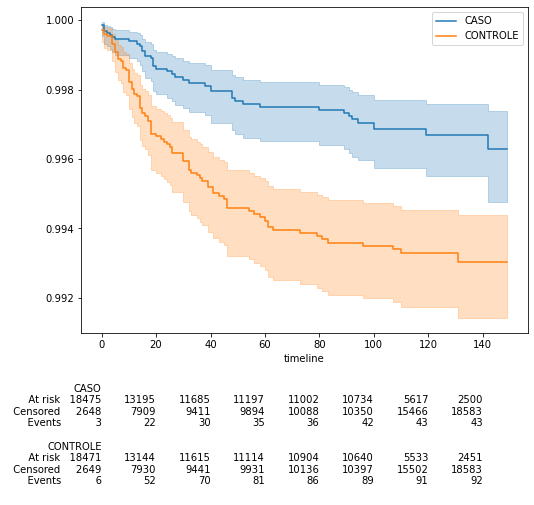

In [20]:
vacinad

<AxesSubplot:>

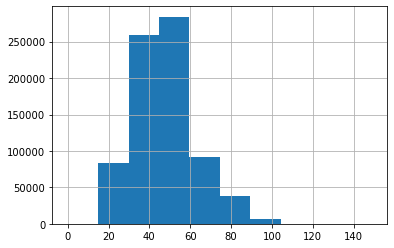

In [23]:
fschema_astra["IDADE"].hist()

In [40]:
sub = fschema[fschema["CPF"].isin(hospital.sub_data["D2"]["CASO"]["CPF"])]


In [41]:
sub[pd.notna(sub["DATA HOSPITALIZACAO"])][["SITUACAO VACINEJA", "STATUS VACINACAO DURANTE COORTE"]]

,SITUACAO VACINEJA,STATUS VACINACAO DURANTE COORTE
9951,RECEBEU AO MENOS UMA DOSE,(D1)(D2)
14817,RECEBEU AO MENOS UMA DOSE,(D1)(D2)
27457,RECEBEU AO MENOS UMA DOSE,(D1)(D2)
40388,RECEBEU AO MENOS UMA DOSE,(D1)(D2)
46159,RECEBEU AO MENOS UMA DOSE,(D1)(D2)
...,...,...
2174302,RECEBEU AO MENOS UMA DOSE,(D1)(D2)
2194383,RECEBEU AO MENOS UMA DOSE,(D1)(D2)
2214350,RECEBEU AO MENOS UMA DOSE,(D1)(D2)
2261124,RECEBEU AO MENOS UMA DOSE,(D1)(D2)


In [36]:
212/433


0.4896073903002309

In [35]:
df5 = pd.read_parquet(os.path.join(pareado_folder, "SURVIVAL", "SURVIVAL_CORONAVAC_D1D2_HOSPITAL_3.parquet"))
df6 = pd.read_parquet(os.path.join(pareado_folder, "SURVIVAL", "SURVIVAL_CORONAVAC_D1D2_HOSPITAL_6.parquet"))

In [39]:
df6["E - D2 HOSPITAL"].sum()

2752

In [38]:
df5["E - D2 HOSPITAL"].sum()

1728

In [43]:
obt = fschema[pd.notna(fschema["DATA OBITO"])]

In [45]:
obt["MESANO"] = obt["DATA OBITO"].apply(lambda x: f'{x.year}{x.month}')

C:\Users\HIGOR~1.MON\AppData\Local\Temp/ipykernel_5488/1987012523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obt["MESANO"] = obt["DATA OBITO"].apply(lambda x: f'{x.year}{x.month}')


In [47]:
obt["MESANO"].value_counts()

20214     665
20215     435
20213     217
20216     186
20217      71
20205      32
20218      25
202112     18
20219      18
202111     15
20212       9
202110      8
20204       5
20206       5
20211       4
20207       3
202012      2
20209       1
20208       1
202011      1
Name: MESANO, dtype: int64

In [133]:
fschema[pd.notna(fschema["DATA UTI"])]["VACINA APLICADA"].value_counts()

NAO VACINADO    826
ASTRAZENECA     763
CORONAVAC       529
PFIZER          283
JANSSEN          13
Name: VACINA APLICADA, dtype: int64

In [71]:
fschema["GRUPO PRIORITARIO"].value_counts()

OUTROS                   1469817
IDOSO                     335572
                          114886
COMORBIDADE                25681
PROFISSIONAL DE SAUDE      24926
TRABALHADOR DA SAUDE        9327
Name: GRUPO PRIORITARIO, dtype: int64

In [52]:
vacinados = pd.read_parquet(os.path.join("..", "..", "..", "data", "PARQUET_TRANSFORMED", "VACINADOS.parquet"))

In [53]:
lst = ["PROFISSIONAL DE SAUDE", "TRABALHADOR DA SAUDE"]
vac_saude = vacinados[vacinados["grupo prioritario(VACINADOS)"].isin(lst)]

In [57]:
fsaude = fschema[fschema["CPF"].isin(vac_saude["cpf(VACINADOS)"])]

In [66]:
fsaude[pd.notna(fsaude["DATA HOSPITALIZACAO"])]["DATA HOSPITALIZACAO"]

694        [2021-04-07T00:00:00.000000]
827        [2021-04-26T00:00:00.000000]
16799      [2021-03-10T00:00:00.000000]
23759      [2021-02-06T00:00:00.000000]
52271      [2021-03-27T00:00:00.000000]
                       ...             
2187326    [2022-01-03T00:00:00.000000]
2201585    [2021-01-16T00:00:00.000000]
2213005    [2021-02-13T00:00:00.000000]
2221108    [2021-02-27T00:00:00.000000]
2249841    [2021-03-01T00:00:00.000000]
Name: DATA HOSPITALIZACAO, Length: 156, dtype: object

In [68]:
vacinados.columns

Index(['nome(VACINADOS)', 'nome mae(VACINADOS)', 'cpf(VACINADOS)',
       'sexo(VACINADOS)', 'data nascimento(VACINADOS)', 'data D1(VACINADOS)',
       'data D2(VACINADOS)', 'data D3(VACINADOS)', 'data D4(VACINADOS)',
       'vacina(VACINADOS)', 'fornecedor(VACINADOS)', 'idade anos(VACINADOS)',
       'faixa etaria(VACINADOS)', 'bairro(VACINADOS)', 'bairro id(VACINADOS)',
       'tipo atendimento(VACINADOS)', 'tipo usuario(VACINADOS)',
       'grupo prioritario(VACINADOS)',
       'data aplicacao consistente(VACINADOS)'],
      dtype='object')

In [74]:
fschema["UTI"].value_counts()

NAO                                                                    6930
SIM                                                                    2416
SEM INFO                                                               2066
NAO;NAO                                                                 235
IGNORADO                                                                 82
NAO;SIM                                                                  66
SEM INFO;NAO                                                             53
SIM;NAO                                                                  46
SIM;SIM                                                                  46
NAO;SEM INFO                                                             42
SEM INFO;SEM INFO                                                        41
SEM INFO;SIM                                                             23
SIM;SEM INFO                                                             17
NAO;NAO;NAO 

In [104]:
fschema_uti = fschema[pd.notna(fschema["UTI"])]
s = fschema_uti[fschema_uti["UTI"].str.contains("SIM")][["DT_ENTUTI", "DATA D1", "DATA D2"]]

In [89]:
s.apply(lambda x: "NAO VACINADO" if x["DT_ENTUTI"]<x["DATA D1"] and x["DT_ENTUTI"]<x["DATA D2"] else ( "D1" if x["DT_ENTUTI"]>x["DATA D1"] and x["DT_ENTUTI"]<x["DATA D2"]))

,DT_ENTUTI,DATA D1,DATA D2
19887,2021-03-20,2021-06-08,2021-08-14
19892,2021-03-18,2021-06-09,2021-08-24
20761,2021-04-14,2021-06-16,2021-08-26
21320,2021-06-05,2021-05-08,2021-07-13
21500,2021-03-27,2021-06-12,2021-09-04
22773,2021-01-28,2021-06-15,2021-09-14
23148,2021-04-16,2021-03-26,NaT
23225,2021-05-19,NaT,NaT
23285,2021-06-16,2021-03-03,2021-05-05
23305,2021-05-14,NaT,NaT


In [90]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 19887 to 38904
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DT_ENTUTI  25 non-null     object        
 1   DATA D1    16 non-null     datetime64[ns]
 2   DATA D2    14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 800.0+ bytes


In [105]:
s["ENTUTI"] = s["DT_ENTUTI"].apply(lambda x: x.split(";"))
s["ENTUTI"] = s["ENTUTI"].apply(lambda x: [pd.to_datetime(xx) for xx in x])
def f(x):
    for xx in x:
        if pd.notna(xx):
            return xx
s["ENTUTI"] = s["ENTUTI"].apply(f)

In [106]:
s["ENTUTI"]

219       2021-04-22
4362      2021-05-06
4370      2021-04-21
4391      2021-06-13
4401      2021-04-27
             ...    
2274327   2021-04-29
2274376   2021-03-18
2274726   2021-04-20
2275024   2021-04-13
2275148   2021-03-26
Name: ENTUTI, Length: 2633, dtype: datetime64[ns]

In [110]:
s["STATUS"] = s.apply(lambda x: "NAO VACINADO" if x["ENTUTI"]<x["DATA D1"] and x["ENTUTI"]<x["DATA D2"] else ("D1" if  x["ENTUTI"]>x["DATA D1"] and x["ENTUTI"]<x["DATA D2"] else ("D2" if  x["ENTUTI"]>x["DATA D1"] and x["ENTUTI"]>x["DATA D2"] else "D1")), axis=1)

In [111]:
s["STATUS"].value_counts()

D1              1387
NAO VACINADO     997
D2               249
Name: STATUS, dtype: int64

In [116]:
fschema["DT_ENTUTI"] = fschema["DT_ENTUTI"].apply(lambda x: [pd.to_datetime(xx) for xx in x.split(";")] if pd.notna(x) else np.nan)

In [124]:
fschema[pd.notna(fschema["DT_ENTUTI"])]["DT_ENTUTI"]

219        [2021-04-22T00:00:00.000000]
4362       [2021-05-06T00:00:00.000000]
4370       [2021-04-21T00:00:00.000000]
4391       [2021-06-13T00:00:00.000000]
4401       [2021-04-27T00:00:00.000000]
                       ...             
2274327    [2021-04-29T00:00:00.000000]
2274376    [2021-03-18T00:00:00.000000]
2274726    [2021-04-20T00:00:00.000000]
2275024    [2021-04-13T00:00:00.000000]
2275148    [2021-03-26T00:00:00.000000]
Name: DT_ENTUTI, Length: 2573, dtype: object

In [121]:
fschema["DT_ENTUTI"] = fschema["DT_ENTUTI"].apply(lambda x: x if not np.all(pd.isna(x)) else np.nan)

In [125]:
def new_hospitalization_date(x, cohort):
    '''
    
    '''
    if not np.any(pd.notna(x)):
        return np.nan
    x = np.sort([xx for xx in x if pd.notna(xx)]) 
    condition = (x>=cohort[0]) & (x<=cohort[1])
    if x[condition].shape[0]>0:
        return x[condition][0]
    else:
        return np.nan

In [127]:
cohort = (dt.datetime(2021, 1, 21), dt.datetime(2021, 8, 31))
fschema["DATA UTI"] = fschema["DT_ENTUTI"].apply(lambda x: new_hospitalization_date(x, cohort))

In [129]:
fschema[pd.notna(fschema["DATA UTI"])]["DATA UTI"]

219       2021-04-22
4362      2021-05-06
4370      2021-04-21
4391      2021-06-13
4401      2021-04-27
             ...    
2274327   2021-04-29
2274376   2021-03-18
2274726   2021-04-20
2275024   2021-04-13
2275148   2021-03-26
Name: DATA UTI, Length: 2414, dtype: datetime64[ns]

In [134]:
fschema["BAIRRO"].value_counts()

NÃO INFOMRADO         296878
MONDUBIM               61790
MESSEJANA              53528
BARRA DO CEARA         53236
JANGURUSSU             48467
                       ...  
DE LOURDES              2074
MANUEL DIAS BRANCO      1041
NOVO MONDUBIM            341
PRAIA DO FUTURO II       171
CONJUNTO CEARA II        132
Name: BAIRRO, Length: 122, dtype: int64